In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import shap
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

shap.initjs()

In [4]:
boston = load_boston()

# Create a Pandas dataframe with all the features
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
y = boston['target']


In [5]:
# Split the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [6]:
# Initiate and fit a Random Forest Regressor 
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [7]:
rf_train = rf_reg.score(Xtrain, ytrain)
rf_cv = cross_val_score(rf_reg, Xtrain, ytrain, cv=5).mean()
rf_test = rf_reg.score(Xtest, ytest)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9772
Cross validation score: 0.8487
Test score: 0.8873


In [8]:
# Initialize JavaScript visualization - use Jupyter notebook to see the interactive features of the plots
shap.initjs()

In [9]:
# Create a TreeExplainer and extract shap values from it - will be used for plotting later
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [10]:
# shap force plot for the first prediction. Here we want to interpret the output value for the 1st observation in our dataframe. 
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [11]:
# SHAP values for all predictions and the direction of their impact
shap.force_plot(explainer.expected_value, shap_values, X)

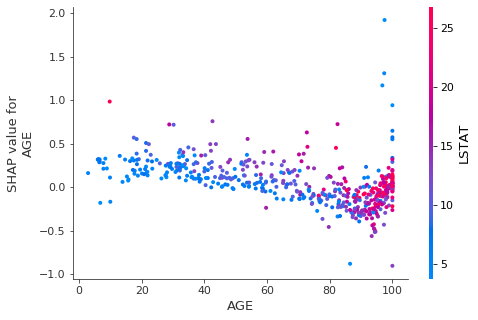

In [14]:
# Effect of a single feature on the shap value,and automatically selected other feature to show dependence 
shap.dependence_plot('AGE', shap_values, X)

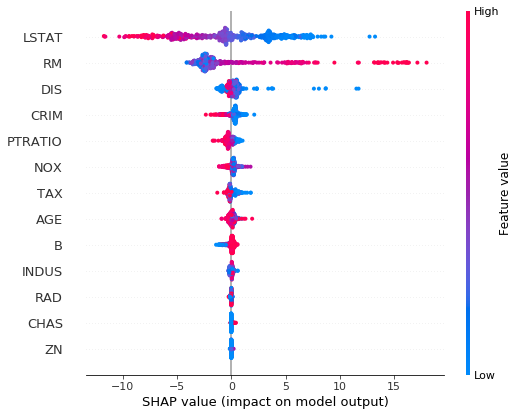

In [15]:
# See the absolute shap value of how each feaure contributes to the model output
shap.summary_plot(shap_values, X)

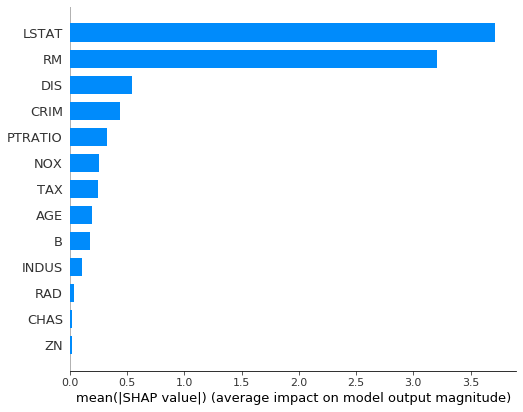

In [16]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [19]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu